# IT-Skills for Research

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 20 16:18:28 2022

@author: angelDu @RB
"""
#%%
### Download necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import datetime 
from pandas.tseries.offsets import BDay
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

# Specifying variables
path = r"C:\Users\angel\Final--crypto\data"
#path= "/Users/julianfischer/projects/Final--crypto/data"


# Defining functions
def loadData(path):
    #cryptoPrices = pd.read_excel(path + '\CommonAssetClassesPrices.xlsx')
    equityPrices = pd.read_excel(path + '\Equities.xlsx')
    bondPrices = pd.read_excel(path + '\Bonds.xlsx')
    cmdtyPrices = pd.read_excel(path + '\Commodities.xlsx')
    vixPrices = pd.read_excel(path + '\VIX.xlsx')
    cryptoPrices = pd.read_excel(path + '\crypto-prices.xlsx')
    cryptoPrices['Dates'] = pd.to_datetime(cryptoPrices['Dates'])
    cryptoPrices.columns = ['Dates', 'BTC', 'ETH', 'XRP', 'XLM']
    
    return equityPrices, bondPrices, cmdtyPrices, vixPrices, cryptoPrices

def loadData_forcoolguys(path):
    #cryptoPrices = pd.read_excel(path + '\CommonAssetClassesPrices.xlsx')
    equityPrices = pd.read_excel(path + '/Equities.xlsx')
    bondPrices = pd.read_excel(path + '/Bonds.xlsx')
    cmdtyPrices = pd.read_excel(path + '/Commodities.xlsx')
    vixPrices = pd.read_excel(path + '/VIX.xlsx')
    cryptoPrices = pd.read_excel(path + '/crypto-prices.xlsx')
    cryptoPrices['Dates'] = pd.to_datetime(cryptoPrices['Dates'])
    cryptoPrices.columns = ['Dates', 'BTC', 'ETH', 'XRP', 'XLM']
    
    return equityPrices, bondPrices, cmdtyPrices, vixPrices, cryptoPrices

def getStartEnd(*data):
    minDate = datetime.datetime.strptime("30/11/0001","%d/%m/%Y")
    maxDate = datetime.datetime.strptime("30/11/3000","%d/%m/%Y")
    for d in data: 
        end = d['Dates'].iat[-1]
        start = d['Dates'][0]
        
        if end<maxDate:
            maxDate = end
            
        if start>minDate:
            minDate = start
            
    return minDate, maxDate
    
            
def makeDataUniformLength(start, end, assetList, *data):
    cnt = 0
    #aggData = []
    aggData = {}
    for d in data:
        d = d[(d['Dates']>=start)&(d['Dates']<=end)]
        #aggData.append([d])
        aggData[assetList[cnt]] = d
        cnt+=1
    
    return aggData

def mergeDataFrames(dictDf, assetList):
    merged = dictDf[assetList[0]]
    
    for i in range(len(assetList)):
        if i == len(assetList)-1:
            break
        merged = pd.merge(merged, dictDf[assetList[i+1]], on = ['Dates'])

    return merged 

def getBusinessDaysOnly(df):
    isBusinessDay = BDay().onOffset
    #isBusinessDay = BDay().is_on_offset()
    match_series = pd.to_datetime(df['Dates']).map(isBusinessDay)
    return df[match_series]

def calcDailyReturn(price):
    rets = price.pct_change(1)
    
    
    return rets

def getCorr(df1,df2):
    corr, _ = pearsonr(df1, df2)
    return corr
    
    
#def plotRelationship(df1,df2):
# Importing data
assetNamesList = ['equity', 'bond', 'commodity', 'vix', 'crypto']
#equity, bond, cmdty, vix, crypto = loadData_forcoolguys(path) 
equity, bond, cmdty, vix, crypto = loadData_forcoolguys(path) 
start, end = getStartEnd(equity, bond, cmdty, vix, crypto)
allData = makeDataUniformLength(start, end, assetNamesList, equity, bond, cmdty, vix, crypto)
mergedData = mergeDataFrames(allData, assetNamesList)


#weeklyData = mergedData.loc[mergedData.groupby(mergedData.index.to_period('W')).apply(lambda x: x.index.max())]



# Calculating returns
dailyRets = {}
for a in assetNamesList:
    dailyRets[a] = calcDailyReturn(allData[a].iloc[:,1:])

mergedDailyRets = calcDailyReturn(mergedData.iloc[:,1:])
mergedDailyRets.index = mergedData.Dates


In [2]:
#rets = mergedData.iloc[:,1:].pct_change(1)
#dataProblem = mergedData.iloc[:19,7] 

#for d in range(len(dataProblem.values)):
#    if d == len(dataProblem.values)-1:
#        break
#    old = dataProblem.values[d]
#    new = dataProblem.values[d+1]
#    
#    if (old<0 and new<0) or (old<0 and new>=0) or (old>0 and new<=0):
#        rets.iloc[d+1,6] = 1 - new/old
#        
#    elif old == 0 and new == 0:
#        rets.iloc[d+1,6] = 0
#        
#    elif old == 0 and new > 0:
#        rets.iloc[d+1,6] = 1
#        
#    else:
#        rets.iloc[d+1,6] = -1
#        
#mergedDailyRets.iloc[1:19,6] = rets.iloc[1:19,6] 


In [24]:
#Replace mergedDailyRets with -100% change to -100.0001% so that cumprod() doesn't return 0
#mergedDailyRets.replace(-1,-1.000001, inplace=True)


,Hang Seng,NASDAQ,Stoxx 50,Nikkei,S&P500,GILTS,US 3m Treasury,US 5YR Treasury,US 10YR Treasury,Euro 10y,...,Copper,Platinum,Crude,Nat. gas,Liver cattle,VIX Index,BTC,ETH,XRP,XLM
Dates,,,,,,,,,,,,,,,,,,,,,
2021-12-31,0.012360,-0.006136,-0.001779,0.000000,-0.002626,-0.006141,0.000000,0.000079,0.001193,0.000000,...,0.016159,0.001658,-0.023135,0.047485,-0.001962,-0.006347,-0.015866,-0.005686,-0.008990,-0.000371
2022-01-03,-0.005254,0.012006,0.007773,0.000000,0.006374,0.000000,0.750000,0.072051,0.078074,-0.003669,...,-0.009426,-0.012626,0.011686,0.022910,-0.005549,-0.036005,0.002121,0.021288,0.002363,0.085318
2022-01-04,0.000648,-0.013269,0.008264,0.017716,-0.000630,0.117405,0.381579,0.002437,0.011855,0.000423,...,0.012113,0.018028,0.011859,-0.025733,-0.007919,0.018675,-0.011785,0.008286,-0.009041,-0.036324
2022-01-05,-0.016427,-0.033448,0.005616,0.001036,-0.019393,0.001843,0.138776,0.053046,0.035148,-0.000362,...,-0.013737,0.031616,0.011263,0.044265,-0.004174,0.166765,-0.051737,-0.066080,-0.064237,-0.044933
2022-01-06,0.007230,-0.001278,-0.015332,-0.028784,-0.000964,0.063477,0.090800,0.027566,0.009324,-0.002415,...,-0.013368,-0.041127,0.020620,-0.018033,0.000728,-0.006082,-0.008867,-0.037374,0.011358,0.003037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,0.016972,-0.011225,0.004914,-0.010618,-0.008936,0.002978,0.000505,0.013257,0.010780,0.000144,...,-0.020442,-0.004913,-0.034029,0.009148,0.000330,0.053730,-0.016987,-0.031366,-0.017618,-0.039621
2022-11-15,0.041057,0.014486,0.007095,0.000955,0.008713,-0.021675,-0.009280,-0.023586,-0.021798,0.005702,...,-0.003522,-0.010261,0.012799,0.017017,-0.001979,0.034134,0.013597,0.007112,0.032417,0.015366
2022-11-16,-0.004723,-0.015385,-0.008253,0.001362,-0.008252,-0.044310,0.021234,-0.011629,-0.021143,0.007536,...,-0.012173,-0.006064,-0.014493,0.033151,0.003471,-0.017522,-0.011627,-0.027814,-0.030963,-0.027134


In [8]:
# Specify different time periods
mergedDailyRets_Covid = mergedDailyRets.iloc[1071:1576,:]
mergedDailyRets_Covid_short = mergedDailyRets.iloc[1071:1324,:]
mergedDailyRets_Covid_today = mergedDailyRets.iloc[1071:,:]
mergedDailyRets_2022 = mergedDailyRets.iloc[1576:,:]


In [9]:
Index_names = mergedData.columns
Index_names


Index(['Dates', 'Hang Seng', 'NASDAQ', 'Stoxx 50', 'Nikkei', 'S&P500', 'GILTS',
       'US 5YR Treasury', 'US 10YR Treasury', 'Euro 10y', 'Japan 10y', 'Corn',
       'Wheat', 'Coffee', 'Soybean', 'Cotton', 'Gold', 'Silver', 'Copper',
       'Platinum', 'Crude', 'Nat. gas', 'Liver cattle', 'VIX Index', 'BTC',
       'ETH', 'XRP', 'XLM'],
      dtype='object')

In [10]:
mergedDailyRets.to_excel(path + '/test.xlsx')

In [17]:
k=[1,6,11,16,20,24,len(Index_names)]
h=0
for j in range(len(k)-1):
    h+=1
    for i in Index_names[k[h-1]:k[h]]:
        if i == 'BTC':
            print(totalRet[i])

Dates
2015-09-30          NaN
2015-10-01     1.006294
2015-10-02     1.005057
2015-10-05     1.017831
2015-10-06     1.043088
                ...    
2022-11-14    70.243681
2022-11-15    71.198803
2022-11-16    70.370943
2022-11-17    70.436723
2022-11-18    70.379039
Name: BTC, Length: 1803, dtype: float64


#### (mergedDailyRets["US 3m Treasury"])


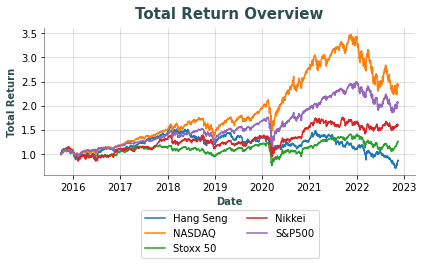

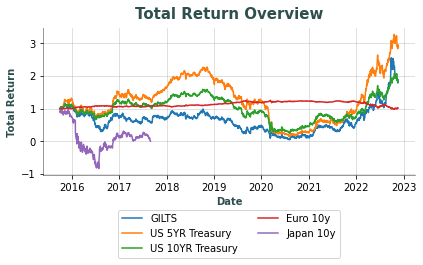

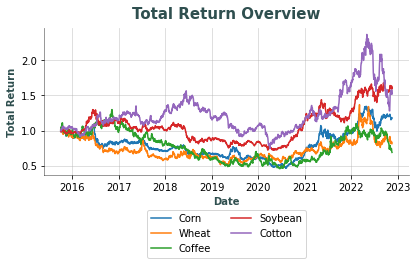

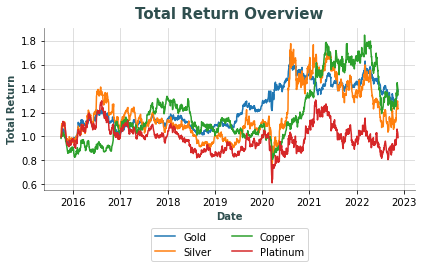

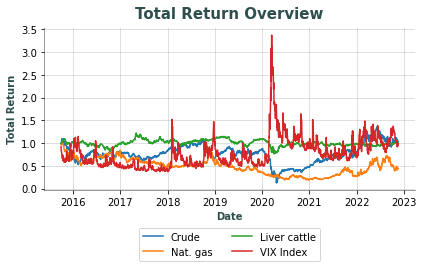

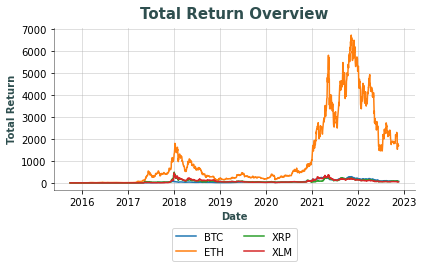

In [14]:
# EDA, plot some returns
totalRet = (mergedDailyRets+1).cumprod()
totalRet_Covid = (mergedDailyRets_Covid+1).cumprod()
totalRet_Covid_short = (mergedDailyRets_Covid_short+1).cumprod()
totalRet_Covid_today = (mergedDailyRets_Covid_today+1).cumprod()
totalRet_2022 = (mergedDailyRets_2022+1).cumprod()

#Plot them, Cryptos separately due to different scale
plotPath = r'C:\Users\angel\Final--crypto\reports\figures'
graphNames = ['Equities', 'Bonds', 'Agriculture', 'Precious metals', 'Other', 'Crypto']

k=[1,6,11,16,20,24,len(Index_names)]
h=0
for j in range(len(k)-1):
    h+=1
    fig, ax = plt.subplots(1,1)
    for i in Index_names[k[h-1]:k[h]]:
        ax.plot(totalRet[i], label="{}".format(i))
        
    ax.set_xlabel("Date", fontweight="demi", c="darkslategray")
    ax.set_ylabel("Total Return", fontweight="demi", c="darkslategray")
    ax.set_title("Total Return Overview",fontsize=15, y=1.02, c="darkslategray", fontweight="bold")
    ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=False, ncol=2)
    #plt.xticks(rotation=70)
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.5) 
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.savefig(plotPath + '\%s.png'%graphNames[j])


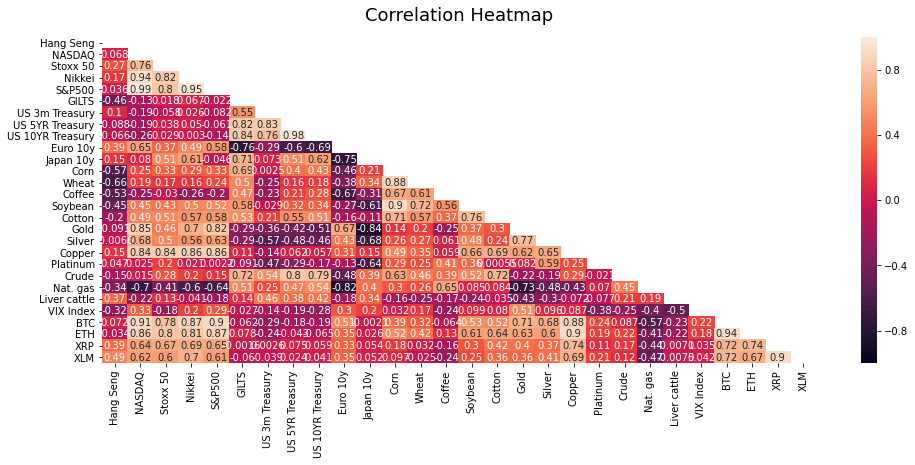

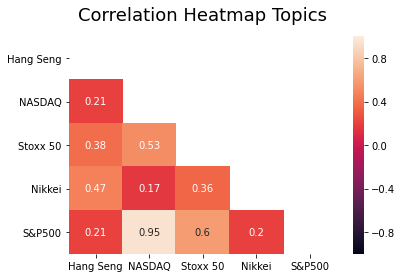

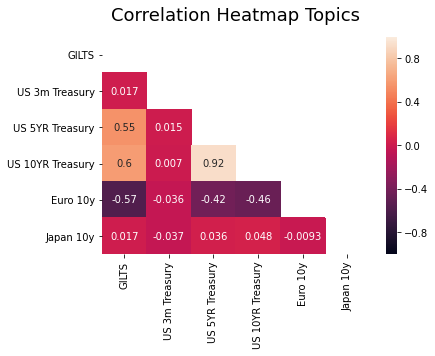

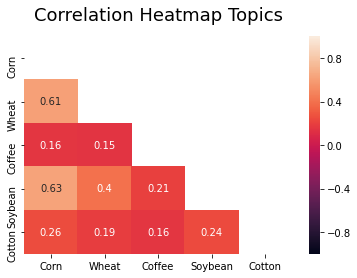

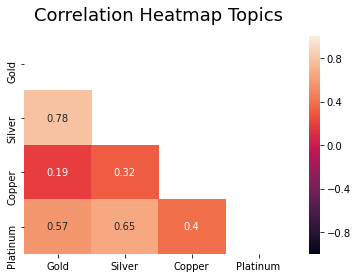

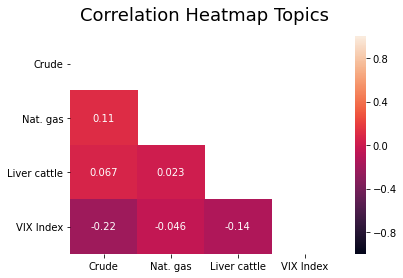

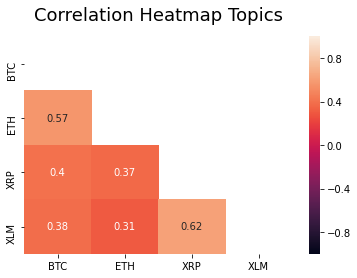

In [15]:
#Calc some correlations
import seaborn as sns
#sns.heatmap(totalRet.corr());

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(mergedDailyRets.corr(), dtype=np.bool))
heatmap = sns.heatmap(totalRet.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig(plotPath + '\corrHeatmap.png')

k=[1,6,12,17,21,25,len(Index_names)]
h=0
for j in range(len(k)-1):
    h+=1
    fig, ax = plt.subplots(1,1)
    mask = np.triu(np.ones_like(mergedDailyRets[Index_names[k[h-1]:k[h]]].corr(), dtype=np.bool))
    heatmap = sns.heatmap(mergedDailyRets[Index_names[k[h-1]:k[h]]].corr(), mask=mask, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap Topics', fontdict={'fontsize':18}, pad=16)
    plt.savefig(plotPath + '\corrHeatmap_%s.png'%graphNames[j])

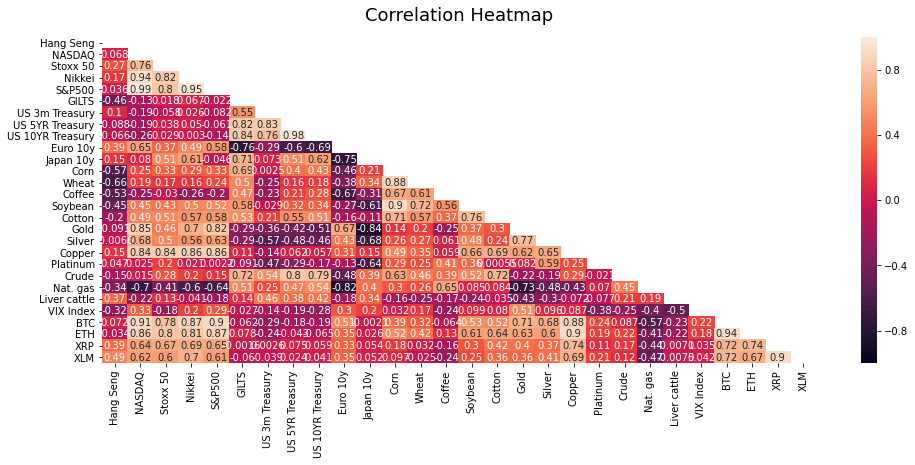

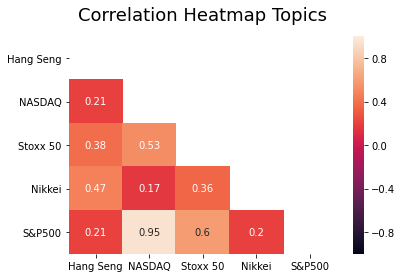

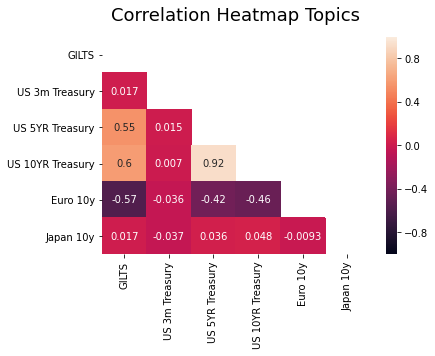

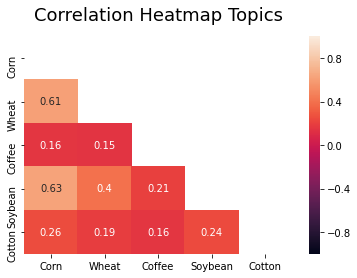

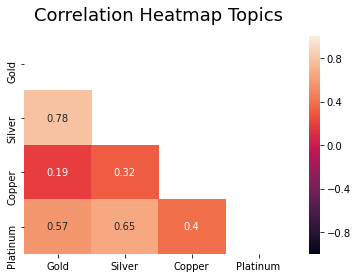

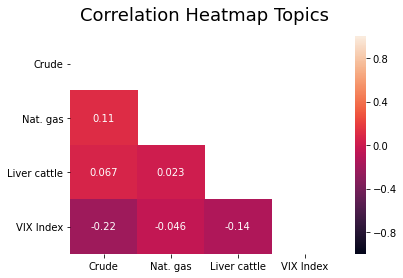

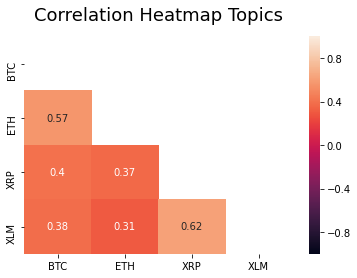

In [16]:
# Calculate some corr for Covid period



plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(mergedDailyRets.corr(), dtype=np.bool))
heatmap = sns.heatmap(totalRet.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

k=[1,6,12,17,21,25,len(Index_names)]
h=0
for j in range(len(k)-1):
    h+=1
    fig, ax = plt.subplots(1,1)
    mask = np.triu(np.ones_like(mergedDailyRets[Index_names[k[h-1]:k[h]]].corr(), dtype=np.bool))
    heatmap = sns.heatmap(mergedDailyRets[Index_names[k[h-1]:k[h]]].corr(), mask=mask, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap Topics', fontdict={'fontsize':18}, pad=16)



In [17]:
"""
Would be interesting to focus on NASDAQ for example and find the best hedging instrument --> Coffee?

or generally check what would work well.."""

'\nWould be interesting to focus on NASDAQ for example and find the best hedging instrument --> Coffee?\n\nor generally check what would work well..'

Table of p-values from the Granger Causality Test:
+------------+-------+
| btc_natgas | 0.353 |
| eth_natgas | 0.496 |
| xrp_natgas | 0.15  |
| xlm_natgas | 0.688 |
+------------+-------+


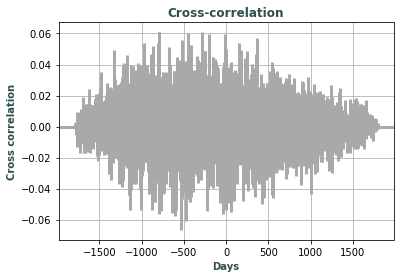

The maximal correlation is obtained 
  by shifting the index -799 days. (to the right if the number is positive.) 



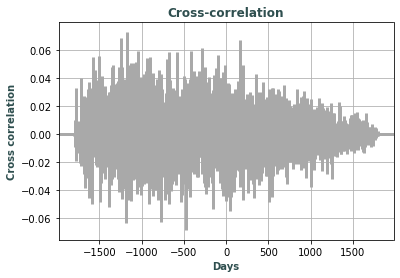

The maximal correlation is obtained 
  by shifting the index -1170 days. (to the right if the number is positive.) 



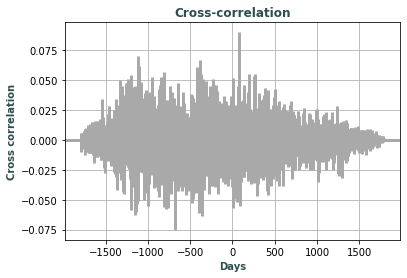

The maximal correlation is obtained 
  by shifting the index 79 days. (to the right if the number is positive.) 



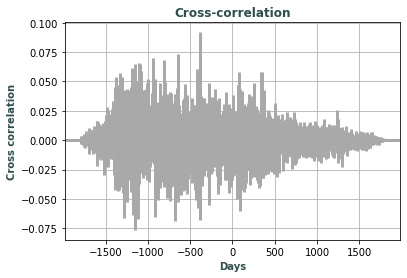

The maximal correlation is obtained 
  by shifting the index -385 days. (to the right if the number is positive.) 



In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
from tabulate import tabulate
from scipy import signal

def get_grframe(grtest):
    #Returns a dataframe with the p-value of the ssr_chi2test
    grlist = []
    for i in range(1,maxlag):
        grlist.append(grtest[i][0]["ssr_chi2test"][1])
    grframe = pd.DataFrame(grlist, np.arange(1,maxlag), columns=['p-value'])
    grframe.index.name = "Number of lags"
    
    return grframe

maxlag= 30

def getpvals(asset1, asset2, returns, maxlag):
    df = pd.DataFrame([returns[asset1],returns[asset2]]).iloc[:,-returns.shape[0]+1:].T
    gtest = grangercausalitytests(df, maxlag, verbose=False)
    return get_grframe(gtest), df

## Create df according to requirements
#df_nasdaq_stoxx = pd.DataFrame([mergedDailyRets["NASDAQ"],mergedDailyRets["Stoxx 50"]]).iloc[:,-mergedDailyRets.shape[0]+1:].T
#df_nasdaq_nikkei = pd.DataFrame([mergedDailyRets["NASDAQ"],mergedDailyRets["Nikkei"]]).iloc[:,-mergedDailyRets.shape[0]+1:].T
#df_vix_nasdaq = pd.DataFrame([mergedDailyRets["VIX Index"],mergedDailyRets["NASDAQ"]]).iloc[:,-mergedDailyRets.shape[0]+1:].T
#df_nasdaq_coffee = pd.DataFrame([mergedDailyRets["NASDAQ"],mergedDailyRets["Coffee"]]).iloc[:,-mergedDailyRets.shape[0]+1:].T


## G-Testing
#gtest_nasdaq_stoxx = grangercausalitytests(df_nasdaq_stoxx, maxlag, verbose=False)
#gtest_nasdaq_nikkei = grangercausalitytests(df_nasdaq_nikkei, maxlag, verbose=False)
#gtest_vix_nasdaq = grangercausalitytests(df_vix_nasdaq, maxlag, verbose=False)
#gtest_nasdaq_coffee = grangercausalitytests(df_nasdaq_coffee, maxlag, verbose=False)


#pvalues_gtest_nasdaq_stoxx = get_grframe(gtest_nasdaq_stoxx)
#pvalues_gtest_nasdaq_nikkei = get_grframe(gtest_nasdaq_nikkei)
#pvalues_gtest_vix_nasdaq = get_grframe(gtest_vix_nasdaq)
#pvalues_gtest_nasdaq_coffee = get_grframe(gtest_nasdaq_coffee)

pvalues_gtest_BTC_natgas, df_BTC_natgas = getpvals("BTC", "Nat. gas", mergedDailyRets, maxlag)
pvalues_gtest_ETH_natgas, df_ETH_natgas = getpvals("ETH", "Nat. gas", mergedDailyRets, maxlag)
pvalues_gtest_XRP_natgas, df_XRP_natgas = getpvals("XRP", "Nat. gas", mergedDailyRets, maxlag)
pvalues_gtest_XLM_natgas, df_XLM_natgas = getpvals("XLM", "Nat. gas", mergedDailyRets, maxlag)






mean_pvalue_table = pd.DataFrame([np.mean(pvalues_gtest_BTC_natgas),np.mean(pvalues_gtest_ETH_natgas), np.mean(pvalues_gtest_XRP_natgas), np.mean(pvalues_gtest_XLM_natgas)])
mean_pvalue_table.columns = ["Mean p-value"]
mean_pvalue_table.index = ["btc_natgas", "eth_natgas", "xrp_natgas","xlm_natgas"]


print("Table of p-values from the Granger Causality Test:")
print(tabulate(round(mean_pvalue_table,3), tablefmt='psql'))

# the null hypothesis would be: X does not granger cause Y or the other way. Also, you accept or reject your null hypothesis depending on the level of significance.
# if P value < Significance level, then Null hypothesis would be rejected.
# if P value > Significance level, then Null hypothesis cannot be rejected.


def crosscorr_plot(data, a, col1, col2, new=False):
    
    fig, ax1 = plt.subplots(1, 1, sharex=True)
    if new==True:
        ax1.xcorr(data[col1], data[col2], usevlines=True, maxlags=len(data[col1])-1,normed=True, lw=3, color="darkgrey")
        ax1.set_title("Cross-correlation",color="darkslategray",fontsize=12, fontweight="bold")
        temp = signal.correlate(data[col1], data[col2])
        shift = len(data[col1])-1

    else:
        
        ax1.xcorr(data[col1], data[col2], usevlines=True, maxlags=len(data[col1])-1,normed=True, lw=3, color="darkgrey")
        ax1.set_title("Cross-correlation",color="darkslategray",fontsize=12, fontweight="bold")
        temp = signal.correlate(data[col1], data[col2])
        shift = len(data[col1])-1

    ax1.grid(True)
    temp2 = int(np.where(temp == max(temp))[0])
    #or temp2 = np.argmax(temp)
    ax1.set_xlabel('Days',color="darkslategray",fontsize=10, fontweight="demi")
    ax1.set_ylabel('Cross correlation',color="darkslategray",fontsize=10, fontweight="demi")
    plt.show()
    print("The maximal correlation is obtained","\n"," by shifting the index",temp2-shift, "days. (to the right if the number is positive.)", "\n")
    return (temp2-shift)


lags_btc_natgas = crosscorr_plot(df_BTC_natgas, 1, "BTC", "Nat. gas")
lags_eth_natgas = crosscorr_plot(df_ETH_natgas, 1, "ETH", "Nat. gas")
lags_xrp_natgas = crosscorr_plot(df_XRP_natgas, 1, "XRP", "Nat. gas")
lags_xlm_natgas = crosscorr_plot(df_XLM_natgas, 1, "XLM", "Nat. gas")



In [31]:
hedge_nasdaq_with_coffee = (((mergedDailyRets["NASDAQ"]+mergedDailyRets["Coffee"])/2)+1).cumprod()
hedge_btc_with_natgas = (((mergedDailyRets["BTC"]+mergedDailyRets["Nat. gas"])/2)+1).cumprod()
hedge_btc_with_soybeans_and_corn = (((mergedDailyRets["BTC"]+mergedDailyRets["Corn"]+mergedDailyRets["Soybean"])/3)+1).cumprod()



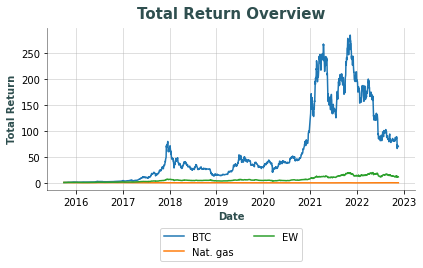

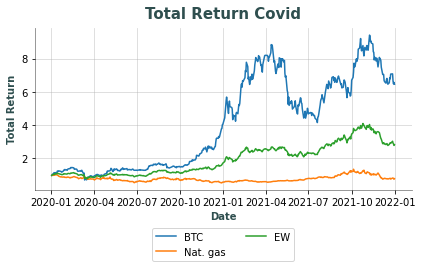

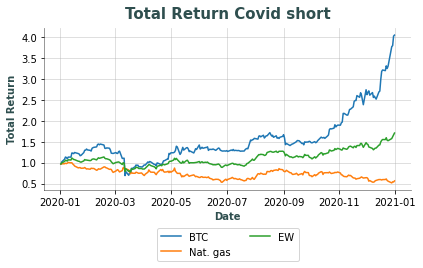

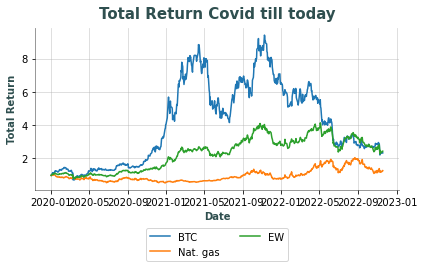

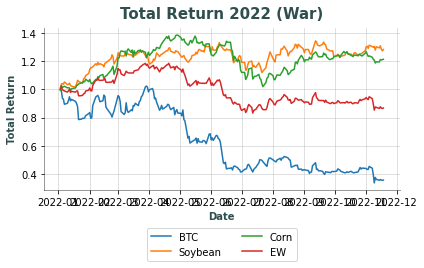

In [32]:
# Just wondering if coffee can hedge nasdaq (Covid and total time window)
Strat_BTC_NatGas = (((mergedDailyRets["BTC"]+mergedDailyRets["Nat. gas"])/2)+1).cumprod()
Strat_BTC_NatGas_Covid = (((mergedDailyRets_Covid["BTC"]+mergedDailyRets_Covid["Nat. gas"])/2)+1).cumprod()
Strat_BTC_NatGas_Covid_short = (((mergedDailyRets_Covid_short["BTC"]+mergedDailyRets_Covid_short["Nat. gas"])/2)+1).cumprod()
Strat_BTC_NatGas_Covid_today = (((mergedDailyRets_Covid_today["BTC"]+mergedDailyRets_Covid_today["Nat. gas"])/2)+1).cumprod()
Strat_BTC_SoyCorn_2022 = (((mergedDailyRets_2022["BTC"]+mergedDailyRets_2022["Soybean"]+mergedDailyRets_2022["Corn"])/3)+1).cumprod()


def plot_three(data1,data2,data3,labels,ylabel,xlabel,title):
    fig, ax = plt.subplots(1,1)
    ax.plot(data1, label=labels[0])
    ax.plot(data2, label=labels[1])
    ax.plot(data3, label=labels[2])
    ax.set_xlabel(xlabel, fontweight="demi", c="darkslategray")
    ax.set_ylabel(ylabel, fontweight="demi", c="darkslategray")
    ax.set_title(title,fontsize=15, y=1.02, c="darkslategray", fontweight="bold")
    ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=False, ncol=2)
    #plt.xticks(rotation=70)
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.5) 
    plt.grid(True, alpha=0.5)
    plt.tight_layout()


def plot_four(data1,data2,data3,data4,labels,ylabel,xlabel,title):
    fig, ax = plt.subplots(1,1)
    ax.plot(data1, label=labels[0])
    ax.plot(data2, label=labels[1])
    ax.plot(data3, label=labels[2])
    ax.plot(data4, label=labels[3])
    ax.set_xlabel(xlabel, fontweight="demi", c="darkslategray")
    ax.set_ylabel(ylabel, fontweight="demi", c="darkslategray")
    ax.set_title(title,fontsize=15, y=1.02, c="darkslategray", fontweight="bold")
    ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=False, ncol=2)
    #plt.xticks(rotation=70)
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.5) 
    plt.grid(True, alpha=0.5)
    plt.tight_layout()

plot_three(totalRet["BTC"],totalRet["Nat. gas"],Strat_BTC_NatGas,["BTC","Nat. gas", "EW"],"Total Return","Date","Total Return Overview")
plot_three(totalRet_Covid["BTC"],totalRet_Covid["Nat. gas"],Strat_BTC_NatGas_Covid,["BTC","Nat. gas", "EW"],"Total Return","Date","Total Return Covid")
plot_three(totalRet_Covid_short["BTC"],totalRet_Covid_short["Nat. gas"],Strat_BTC_NatGas_Covid_short,["BTC","Nat. gas", "EW"],"Total Return","Date","Total Return Covid short")
plot_three(totalRet_Covid_today["BTC"],totalRet_Covid_today["Nat. gas"],Strat_BTC_NatGas_Covid_today,["BTC","Nat. gas", "EW"],"Total Return","Date","Total Return Covid till today")
plot_four(totalRet_2022["BTC"],totalRet_2022["Soybean"],totalRet_2022["Corn"],Strat_BTC_SoyCorn_2022,["BTC","Soybean","Corn", "EW"],"Total Return","Date","Total Return 2022 (War)")


